In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import joblib
from flask import Flask, render_template, request
import pickle
import pandas as pd

In [3]:
cars_data = pd.read_csv('./Cardetails.csv')

In [4]:
cars_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
cars_data.drop(columns=['torque'], inplace=True)

In [6]:
cars_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [7]:
cars_data.shape

(8128, 12)

In [8]:
#preprocessing

In [9]:
#NULL ChecK

In [10]:
cars_data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

In [11]:
cars_data.dropna(inplace=True)

In [12]:
cars_data.shape

(7907, 12)

In [13]:
#Duplicate Check

In [14]:
cars_data.duplicated().sum()

1189

In [15]:
cars_data.drop_duplicates(inplace=True)

In [16]:
cars_data.shape

(6718, 12)

In [17]:
cars_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0


In [18]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   object 
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   object 
 5   seller_type    6718 non-null   object 
 6   transmission   6718 non-null   object 
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   object 
 9   engine         6718 non-null   object 
 10  max_power      6718 non-null   object 
 11  seats          6718 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 682.3+ KB


In [19]:
#Data Analysis

In [20]:
for col in cars_data.columns:
    print('Unique values of ' + col)
    print(cars_data[col].unique())
    print("======================")

Unique values of name
['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']
Unique values of year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
Unique values of selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   745000  1025000
   235000  1700000  1200000   610000  2500000   484999   315000  

In [21]:
def get_brand_name(car_name):
    car_name = car_name.split(' ')[0]
    return car_name.strip()

In [22]:
def clean_data(value):
    value = value.split(' ')[0]
    value = value.strip()
    if value == '':
        value = 0
    return float(value)

In [23]:
get_brand_name('Maruti  Swift Dzire VDI')

'Maruti'

In [24]:
cars_data['name'] = cars_data['name'].apply(get_brand_name)

In [25]:
cars_data['name'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

In [26]:
cars_data['mileage'] = cars_data['mileage'].apply(clean_data)

In [27]:
cars_data['max_power'] = cars_data['max_power'].apply(clean_data)

In [28]:
cars_data['engine'] = cars_data['engine'].apply(clean_data)

In [29]:
for col in cars_data.columns:
    print('Unique values of ' + col)
    print(cars_data[col].unique())
    print("======================")

Unique values of name
['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi' 'Audi'
 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo' 'Daewoo'
 'Kia' 'Fiat' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel']
Unique values of year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
Unique values of selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   745000  10250

In [30]:
cars_data['name'].replace(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'],
                          [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
                          ,inplace=True)

In [31]:
cars_data['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [32]:
cars_data['transmission'].replace(['Manual', 'Automatic'],[1,2], inplace=True)

In [33]:
cars_data['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [34]:
cars_data['seller_type'].replace(['Individual', 'Dealer', 'Trustmark Dealer'],[1,2,3], inplace=True)

In [35]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   int64  
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   object 
 5   seller_type    6718 non-null   int64  
 6   transmission   6718 non-null   int64  
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   float64
 9   engine         6718 non-null   float64
 10  max_power      6718 non-null   float64
 11  seats          6718 non-null   float64
dtypes: float64(4), int64(6), object(2)
memory usage: 682.3+ KB


In [36]:
cars_data['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [37]:
cars_data['fuel'].replace(['Diesel', 'Petrol', 'LPG', 'CNG'],[1,2,3,4], inplace=True)

In [38]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   int64  
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   int64  
 5   seller_type    6718 non-null   int64  
 6   transmission   6718 non-null   int64  
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   float64
 9   engine         6718 non-null   float64
 10  max_power      6718 non-null   float64
 11  seats          6718 non-null   float64
dtypes: float64(4), int64(7), object(1)
memory usage: 682.3+ KB


In [39]:
cars_data.reset_index(inplace=True)

In [40]:
cars_data

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,0,1,2014,450000,145500,1,1,1,First Owner,23.40,1248.0,74.00,5.0
1,1,2,2014,370000,120000,1,1,1,Second Owner,21.14,1498.0,103.52,5.0
2,2,3,2006,158000,140000,2,1,1,Third Owner,17.70,1497.0,78.00,5.0
3,3,4,2010,225000,127000,1,1,1,First Owner,23.00,1396.0,90.00,5.0
4,4,1,2007,130000,120000,2,1,1,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6713,8121,1,2013,260000,50000,2,1,1,Second Owner,18.90,998.0,67.10,5.0
6714,8122,4,2014,475000,80000,1,1,1,Second Owner,22.54,1396.0,88.73,5.0
6715,8123,4,2013,320000,110000,2,1,1,First Owner,18.50,1197.0,82.85,5.0
6716,8124,4,2007,135000,119000,1,1,1,Fourth & Above Owner,16.80,1493.0,110.00,5.0


In [41]:
cars_data['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [42]:
cars_data['owner'].replace(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'],
                           [1,2,3,4,5], inplace=True)

In [43]:
cars_data.drop(columns=['index'], inplace=True)

In [44]:
for col in cars_data.columns:
    print('------------')
    print(col)
    print(cars_data[col].unique())

------------
name
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
------------
year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
------------
selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   745000  1025000
   235000  1700000  1200000   610000  2500000   484999   315000   290000
   455000   351000   535000   175000   565000   120000   725000   185000
   615000   270000   625000   866000   375000 

In [45]:
cars_data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [46]:
input_data = cars_data.drop(columns=['selling_price'])
output_data =cars_data['selling_price']

In [47]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2)

In [48]:
#model Creation

In [49]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6718 entries, 0 to 6717
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   int64  
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   int64  
 5   seller_type    6718 non-null   int64  
 6   transmission   6718 non-null   int64  
 7   owner          6718 non-null   int64  
 8   mileage        6718 non-null   float64
 9   engine         6718 non-null   float64
 10  max_power      6718 non-null   float64
 11  seats          6718 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 629.9 KB


In [50]:
model = LinearRegression()

In [51]:
#Train MOdel

In [52]:
model.fit(x_train, y_train)

LinearRegression()

In [53]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate on training data
train_pred = model.predict(x_train)
train_r2 = r2_score(y_train, train_pred)
train_mse = mean_squared_error(y_train, train_pred)

# Evaluate on test data
test_pred = model.predict(x_test)
test_r2 = r2_score(y_test, test_pred)
test_mse = mean_squared_error(y_test, test_pred)

# Print results
print(f"Training R²: {train_r2:.4f}, Training MSE: {train_mse:.4f}")
print(f"Testing R²: {test_r2:.4f}, Testing MSE: {test_mse:.4f}")

# Determine if model is underfitting or overfitting
if train_r2 > 0.9 and test_r2 < 0.7:
    print("The model is overfitting (high training score, low test score). Consider regularization.")
elif train_r2 < 0.7 and test_r2 < 0.7:
    print("The model is underfitting (both scores are low). Consider adding features or using a more complex model.")
else:
    print("The model has a good balance between training and test performance.")

model.score(x_test, y_test)

In [54]:
# Evaluate on training data
train_pred = model.predict(x_train)
train_r2 = r2_score(y_train, train_pred)
train_mse = mean_squared_error(y_train, train_pred)

In [55]:
# Evaluate on test data
test_pred = model.predict(x_test)
test_r2 = r2_score(y_test, test_pred)
test_mse = mean_squared_error(y_test, test_pred)

In [56]:
# Print results
print(f"Training R²: {train_r2:.4f}, Training MSE: {train_mse:.4f}")
print(f"Testing R²: {test_r2:.4f}, Testing MSE: {test_mse:.4f}")

Training R²: 0.6054, Training MSE: 112840025782.3725
Testing R²: 0.6729, Testing MSE: 74072314475.8456


In [57]:
# Determine if model is underfitting or overfitting
if train_r2 > 0.9 and test_r2 < 0.7:
    print("The model is overfitting (high training score, low test score). Consider regularization.")
elif train_r2 < 0.7 and test_r2 < 0.7:
    print("The model is underfitting (both scores are low). Consider adding features or using a more complex model.")
else:
    print("The model has a good balance between training and test performance.")

The model is underfitting (both scores are low). Consider adding features or using a more complex model.


In [58]:
model.score(x_test, y_test)

0.6728627785786725

In [59]:
x_train.head(1)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
652,1,2014,35000,2,1,1,1,23.1,998.0,67.04,5.0


In [60]:
input_data_model = pd.DataFrame(
    [[5,2022,12000,1,1,1,1,12.99,2494.0,100.6,5.0]],
    columns=['name','year','km_driven','fuel','seller_type','transmission','owner','mileage','engine','max_power','seats'])

In [61]:
input_data_model

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,5,2022,12000,1,1,1,1,12.99,2494.0,100.6,5.0


In [62]:
model.predict(x_test.head(10))

array([ 470503.80673425,  503002.14288415,  446772.01414797,
        636398.88000183,  371040.45259266, 1592393.57824178,
         70939.34480238,  737970.44825998,  906742.11691591,
        418964.92666937])

In [63]:
y_test.head(10)

4267     600000
2449     350000
2075     650000
5641     715000
6050     370000
4313    1300000
3826      80000
3194     565000
585     1100000
5149     339000
Name: selling_price, dtype: int64

In [64]:
from sklearn.svm import SVR
m = SVR(kernel="poly")
m.fit(x_train, y_train)
m.score(x_test, y_test)

-0.05763565783912217

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gm = GradientBoostingRegressor().fit(x_train, y_train)
gm.score(x_test, y_test)

0.9199340252060456

In [89]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate on training data
train_pred = gm.predict(x_train)
train_r2 = r2_score(y_train, train_pred)
train_mse = mean_squared_error(y_train, train_pred)

# Evaluate on test data
test_pred = gm.predict(x_test)
test_r2 = r2_score(y_test, test_pred)
test_mse = mean_squared_error(y_test, test_pred)

# Print results
print(f"Training R²: {train_r2:.4f}, Training MSE: {train_mse:.4f}")
print(f"Testing R²: {test_r2:.4f}, Testing MSE: {test_mse:.4f}")

# Determine if model is underfitting or overfitting
if train_r2 > 0.9 and test_r2 < 0.7:
    print("The model is overfitting (high training score, low test score). Consider regularization.")
elif train_r2 < 0.7 and test_r2 < 0.7:
    print("The model is underfitting (both scores are low). Consider adding features or using a more complex model.")
else:
    print("The model has a good balance between training and test performance.")

gm.score(x_test, y_test)

Training R²: 0.9490, Training MSE: 14586821007.8246
Testing R²: 0.9199, Testing MSE: 18129004208.0374
The model has a good balance between training and test performance.


0.9199340252060456

In [66]:
from sklearn.tree import DecisionTreeRegressor
m1 = DecisionTreeRegressor()
m1.fit(x_train, y_train)
m1.score(x_test, y_test)

0.8770246657597843

In [67]:
m1.score(x_train, y_train)

0.9991965776474522

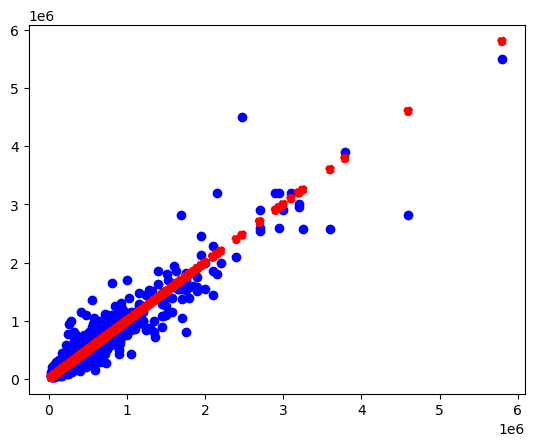

In [68]:
import matplotlib.pyplot as plt

plt.scatter(y_test, m1.predict(x_test), color='blue', label='Predicted vs Actual')  # Scatter plot
plt.scatter(y_test, y_test, color='red', linestyle='dashed', label='Perfect Prediction')  # Ideal line

In [69]:
model.predict(input_data_model)

array([979344.42853856])

In [70]:
model.score(x_test,y_test)

0.6728627785786725

In [71]:
# Implementing Linear Regression Manually
def linear_regression_manual(X, y):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
    theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)  # Normal equation
    return theta

def predict_manual(X, theta):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
    return X_b.dot(theta)

# Train model
theta = linear_regression_manual(x_train, y_train)

# Evaluate on training data
train_pred = predict_manual(x_train, theta)
train_mse = np.mean((y_train - train_pred) ** 2)
train_r2 = 1 - (np.sum((y_train - train_pred) ** 2) / np.sum((y_train - np.mean(y_train)) ** 2))

# Evaluate on test data
test_pred = predict_manual(x_test, theta)
test_mse = np.mean((y_test - test_pred) ** 2)
test_r2 = 1 - (np.sum((y_test - test_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

# Print results
print(f"Training R²: {train_r2:.4f}, Training MSE: {train_mse:.4f}")
print(f"Testing R²: {test_r2:.4f}, Testing MSE: {test_mse:.4f}")

# Determine if model is underfitting or overfitting
if train_r2 > 0.9 and test_r2 < 0.7:
    print("The model is overfitting (high training score, low test score). Consider regularization.")
elif train_r2 < 0.7 and test_r2 < 0.7:
    print("The model is underfitting (both scores are low). Consider adding features or using a more complex model.")
else:
    print("The model has a good balance between training and test performance.")

Training R²: 0.6054, Training MSE: 112840025782.3721
Testing R²: 0.6729, Testing MSE: 74072314475.9865
The model is underfitting (both scores are low). Consider adding features or using a more complex model.


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(m1, x_train, y_train, cv=5, scoring='r2')  # 5-fold CV
print("Cross-Validation R2 Scores:", cv_scores)
print("Mean R2 Score:", cv_scores.mean())

Cross-Validation R2 Scores: [0.76351731 0.82994015 0.8234534  0.84825834 0.7964522 ]
Mean R2 Score: 0.8123242806785301


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_pred = m1.predict(x_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

R² Score: 0.8770
MAE: 96575.2479
MSE: 27844791219.5283
RMSE: 166867.5859


In [ ]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)
print("Test Score:", grid_search.score(x_test, y_test))

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Cross-Validation Score: 0.8485090162208199
Test Score: 0.8800758508065603


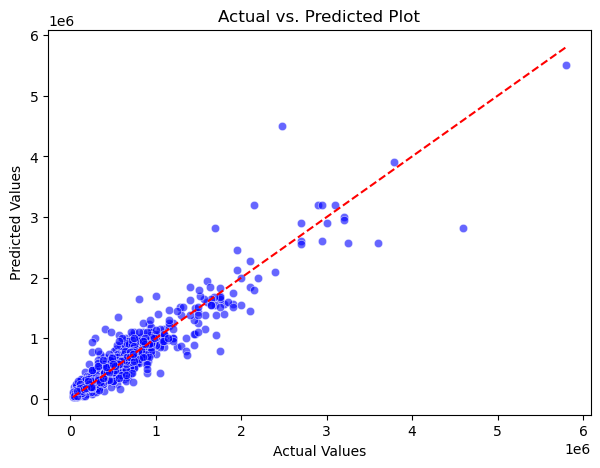

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = m1.predict(x_test)

plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')  # Ideal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Plot")
plt.show()

In [76]:
y_pred = m1.predict(x_test)

In [ ]:
residuals = y_test - y_pred  # Define residuals properly

e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


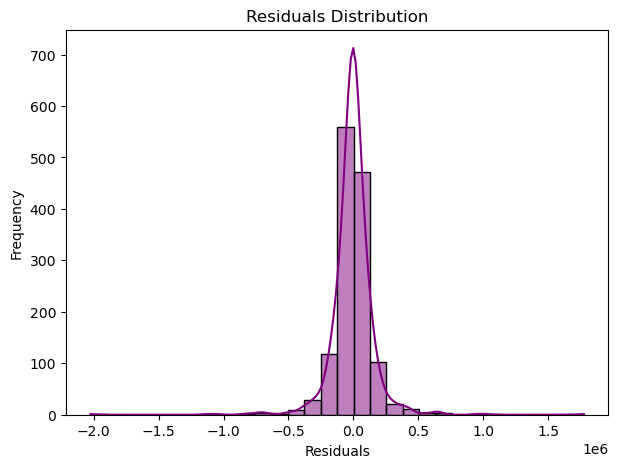

In [ ]:
plt.figure(figsize=(7, 5))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.show()

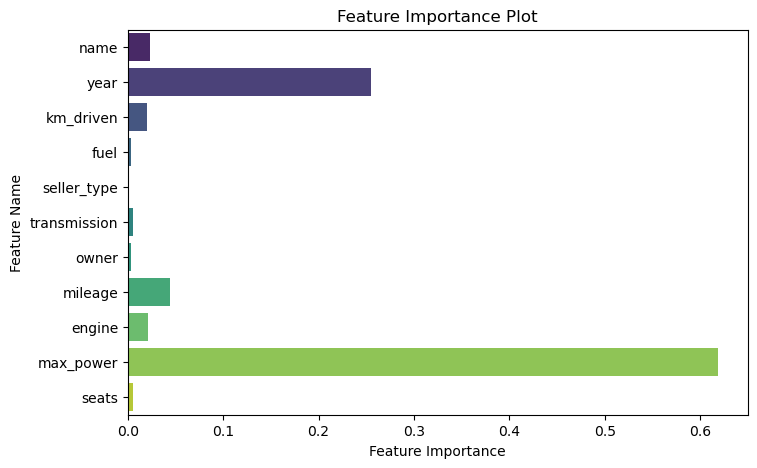

In [ ]:
import numpy as np

feature_importances = m1.feature_importances_  # Only for tree-based models
feature_names = x_train.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances, y=feature_names, palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance Plot")
plt.show()

e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


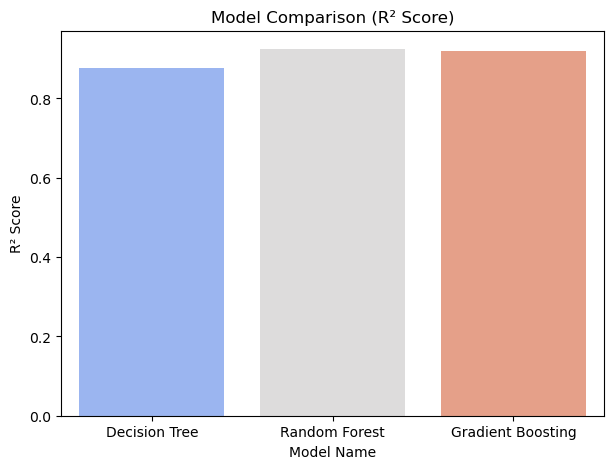

In [87]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
models = {
    "Decision Tree": m1,
    "Random Forest": RandomForestRegressor().fit(x_train, y_train),
    "Gradient Boosting": GradientBoostingRegressor().fit(x_train, y_train),
}

r2_scores = {name: r2_score(y_test, model.predict(x_test)) for name, model in models.items()}

plt.figure(figsize=(7, 5))
sns.barplot(x=list(r2_scores.keys()), y=list(r2_scores.values()), palette="coolwarm")
plt.xlabel("Model Name")
plt.ylabel("R² Score")
plt.title("Model Comparison (R² Score)")
plt.show()

In [81]:
import joblib

# Save the model
joblib.dump(m1, 'decision_tree_regressor.pkl')

# Load the model later when needed
loaded_model = joblib.load('decision_tree_regressor.pkl')

# Test the loaded model
y_pred_loaded = loaded_model.predict(x_test)


In [82]:
import joblib

# Save the model
joblib.dump(gm, 'gradient_boosting_regressor.pkl')

# Load the model later when needed
loaded_model = joblib.load('gradient_boosting_regressor.pkl')

# Test the loaded model
y_pred_loaded = loaded_model.predict(x_test)


In [83]:
m1.predict(x_test.head(5))

array([470000., 350000., 525000., 650000., 225000.])

In [84]:
y_test.head(5)

4267    600000
2449    350000
2075    650000
5641    715000
6050    370000
Name: selling_price, dtype: int64

In [85]:
gm.predict(x_test.head(5))

array([509015.55805503, 419900.13222174, 462659.4537739 , 641642.91182598,
       381675.99849749])